In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #this is used for plot styling
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

# Begin by reading the original data
df1 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame we need with extra features taken directly from the real data (df1)
financial_data = pd.DataFrame(df1, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given
nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans

# Save the original data frame as target data frame
target_data = financial_data

# Drop the symbols for KMeans
financial_data = financial_data.drop('Symbol', 1)

#display(target_data)

financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']

# Calculate earnings per share ratio
#financial_data_norm['EarningsPerShare'] = (df1['Net Income'] - df1['Preferred Dividends']) / df1['Weighted Average Shs Out']

# Get the P/E ratio directly from data
#financial_data_norm['PriceEarningsRatio'] = df1['PE ratio']

# Calculate debt to equity ratio
#financial_data_norm['DebtEquityRatio'] = (df1['Short-term debt'] + df1['Long-term debt']) / df1['Total shareholders equity']

# Get the return on equity ratio
#financial_data_norm['ReturnOnEquity'] = df1['returnOnEquity']

# Get the quick ratio
#financial_data_norm['QuickRatio'] = df1['quickRatio']

# Calculate the working capital ratio
#financial_data_norm['WorkingCapitalRatio'] = df1['Total current assets'] / df1['Total current liabilities']

# Get rid of empty values from the date given
#nan_value = float("NaN")
#financial_data_norm.replace("", nan_value, inplace=True) #change empty data to nan
#financial_data_norm.replace(0, nan_value, inplace=True) #change zero data to nan
#financial_data_norm.dropna(axis=0, inplace = True) #get rid of nans

display(financial_data_norm)

,Revenue,Revenue Growth,Gross Profit,Operating Income,Earnings before Tax,Free Cash Flow,Net Income,Total current assets,Operating Expenses,Net Debt,Short-term debt,Long-term debt,Total shareholders equity,Weighted Average Shs Out,Total current liabilities,Total debt,Total liabilities
0,0.301064,3.551969e-13,0.301064,0.060555,0.048138,0.038180,0.037371,0.069599,0.240508,0.344047,0.014010,0.340862,0.228132,0.014493,0.087933,0.356790,0.570226
1,0.167460,3.788682e-13,0.081173,0.044920,0.026000,0.025088,0.019050,0.067746,0.036253,0.403068,0.040113,0.401790,0.398735,0.026130,0.089472,0.441902,0.517025
2,0.498944,9.077731e-13,0.308016,0.164202,0.164209,0.100362,0.148265,0.202731,0.143814,0.103588,0.008881,0.176752,0.525107,0.032142,0.117088,0.185632,0.376067
3,0.518767,8.458072e-12,0.305395,0.255944,0.244149,0.145452,0.241281,0.273782,0.049451,-0.036922,0.014663,0.064524,0.551251,0.019798,0.098219,0.079187,0.172610
4,0.030275,1.479790e-14,0.030275,0.012564,0.011475,0.013112,0.009339,0.258466,0.017711,-0.147315,0.012600,0.075980,0.087925,0.003256,0.627086,0.144993,0.693444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0.514671,2.803640e-10,0.481521,0.296706,0.278824,0.079061,0.213825,0.172131,0.184815,0.054777,0.022969,0.181739,-0.034130,0.027690,0.088604,0.204708,0.365336
2197,0.049056,-1.138410e-09,0.048311,0.030537,0.030537,0.020978,0.033890,0.418441,0.017773,-0.017367,0.057221,0.059619,0.885286,0.064030,0.071820,0.059619,0.112799
2198,0.349607,1.617785e-09,0.223907,0.063359,0.059676,-0.044834,0.043301,0.433747,0.160548,-0.020960,0.031848,0.094694,0.720433,0.075202,0.081726,0.126542,0.210892
2199,0.276047,9.231134e-10,0.255016,0.030589,0.022720,0.039828,0.008468,0.185829,0.224427,0.083578,0.064408,0.087953,0.777423,0.142316,0.125438,0.152360,0.297148


k: 1  cost: 726.389732919981
k: 2  cost: 540.9483327651726
k: 3  cost: 424.0756987078632
k: 4  cost: 347.93608596908007
k: 5  cost: 311.50083101918995
k: 6  cost: 283.9853357625576
k: 7  cost: 267.6311441780169
k: 8  cost: 254.20872721646356
k: 9  cost: 242.17144807928247
k: 10  cost: 230.66548387741184
k: 11  cost: 221.09683409644495
k: 12  cost: 210.53842091417664
k: 13  cost: 204.1253337027301
k: 14  cost: 197.58660991618083
k: 15  cost: 191.36008085317792
k: 16  cost: 187.08238046759547
k: 17  cost: 182.75206805818686
k: 18  cost: 178.7411263808576
k: 19  cost: 175.90344825215274
[726.389732919981, 540.9483327651726, 424.0756987078632, 347.93608596908007, 311.50083101918995, 283.9853357625576, 267.6311441780169, 254.20872721646356, 242.17144807928247, 230.66548387741184, 221.09683409644495, 210.53842091417664, 204.1253337027301, 197.58660991618083, 191.36008085317792, 187.08238046759547, 182.75206805818686, 178.7411263808576, 175.90344825215274]


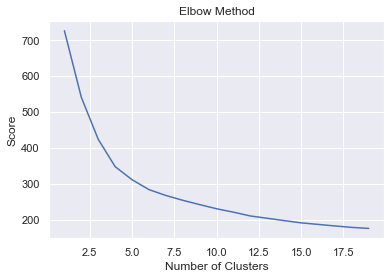

In [126]:
score = [0]*19
number_clusters = range(1, 20)
for k in range (1, 20):
 
    #Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(financial_data_norm.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    score[k-1] = interia
    print ("k:",k, " cost:", interia)
    
print(score)

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()
